# Adaboost Classifier

#### Import the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

#### Creating the DataFrame

In [43]:
df = pd.DataFrame()
df['feature1'] = [9,9,7,6,6,5,4,3,2,1]
df['feature2'] = [2,9,8,5,9,1,8,6,3,5]
df['target'] =[0,0,1,0,1,0,1,0,1,1]
df

,feature1,feature2,target
0,9,2,0
1,9,9,0
2,7,8,1
3,6,5,0
4,6,9,1
5,5,1,0
6,4,8,1
7,3,6,0
8,2,3,1
9,1,5,1


#### Exploratory Data Analysis

,feature1,feature2,target
feature1,1.000000,0.192026,-0.461538
feature2,0.192026,1.000000,0.361787
target,-0.461538,0.361787,1.000000


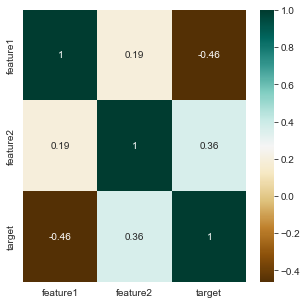

In [44]:
plt.figure(figsize=(5,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

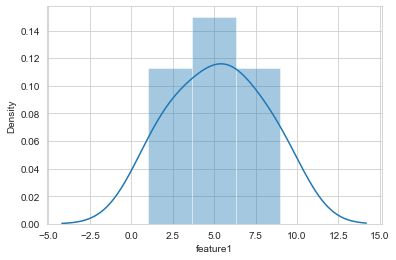

In [45]:
data = df['feature1']
sns.distplot(data)
plt.show()

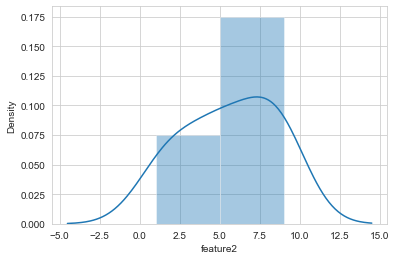

In [46]:
data = df['feature2']
sns.distplot(data)
plt.show()

In [47]:
df.describe()

,feature1,feature2,target
count,10.000000,10.00000,10.000000
mean,5.200000,5.60000,0.500000
std,2.740641,2.91357,0.527046
min,1.000000,1.00000,0.000000
25%,3.250000,3.50000,0.000000
50%,5.500000,5.50000,0.500000
75%,6.750000,8.00000,1.000000
max,9.000000,9.00000,1.000000


#### Plot the datapoints

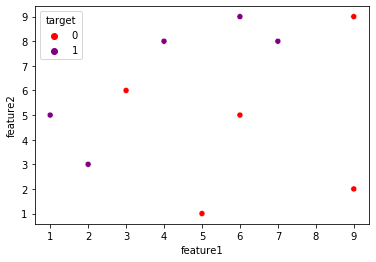

In [315]:
sns.scatterplot(x=df['feature1'],y=df['feature2'],hue=df['target'],palette=['red','purple'])

In [316]:
df.shape

(10, 3)

In [317]:
df['w'] = 1/df.shape[0]
df

,feature1,feature2,target,w
0,9,2,0,0.1
1,9,9,0,0.1
2,7,8,1,0.1
3,6,5,0,0.1
4,6,9,1,0.1
5,5,1,0,0.1
6,4,8,1,0.1
7,3,6,0,0.1
8,2,3,1,0.1
9,1,5,1,0.1


### Classification using Decision tree as a base classifier

#### Used Decision tree as a weak classifier with max depth of 1

In [318]:
m1 = DecisionTreeClassifier(max_depth=1)

In [319]:
X = df.iloc[:,0:2].values   # features
y = df.iloc[:,2].values     # target

In [320]:
m1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 2.5\nentropy = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.469\nsamples = 8\nvalue = [5, 3]')]

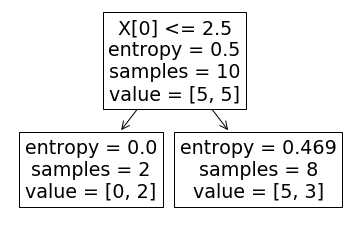

In [321]:
plot_tree(m1)

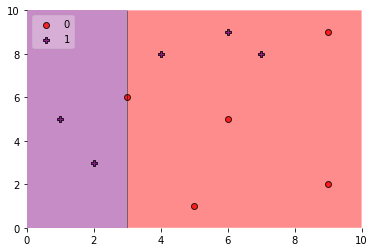

In [322]:
plot_decision_regions(X, y, clf=m1, legend=2,colors='red,purple',markers='oP')

In [323]:
df['y_pred'] = m1.predict(X)
df

,feature1,feature2,target,w,y_pred
0,9,2,0,0.1,0
1,9,9,0,0.1,0
2,7,8,1,0.1,0
3,6,5,0,0.1,0
4,6,9,1,0.1,0
5,5,1,0,0.1,0
6,4,8,1,0.1,0
7,3,6,0,0.1,0
8,2,3,1,0.1,1
9,1,5,1,0.1,1


#### Computing the error

In [324]:
def calculate_model_wt(error):
    return 0.5*np.log((1-error)/(error))

Text(0, 0.5, 'Alpha')

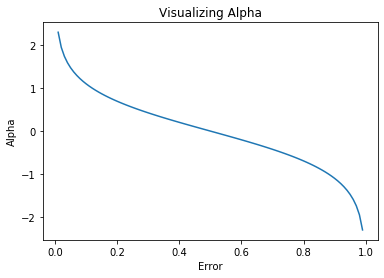

In [325]:
error = np.arange(0,1,0.01)
alpha_t = 1/2*np.log((1-error)/error) #equation for alpha t

plt.plot(error, alpha_t)
plt.title('Visualizing Alpha')
plt.xlabel('Error')
plt.ylabel('Alpha')

In [326]:
alpha1 = calculate_model_wt(0.3)   # wt of misclassifications=0.1+0.1+0.1=0.3
alpha1

0.42364893019360184

In [327]:
#Adaboost works by increasing the weight of misclassified datapoints and decreases the weight of correct classifications
def update_row_weights(row,alpha=0.423):
    if row['target'] == row['y_pred']:
        return row['w'] * np.exp(-alpha)   # correct classification
    else:
        return row['w'] * np.exp(alpha)    # incorrect classification

In [328]:
# add column with the updated weights 
df['updated_w'] = df.apply(update_row_weights,axis=1)
df

,feature1,feature2,target,w,y_pred,updated_w
0,9,2,0,0.1,0,0.065508
1,9,9,0,0.1,0,0.065508
2,7,8,1,0.1,0,0.152653
3,6,5,0,0.1,0,0.065508
4,6,9,1,0.1,0,0.152653
5,5,1,0,0.1,0,0.065508
6,4,8,1,0.1,0,0.152653
7,3,6,0,0.1,0,0.065508
8,2,3,1,0.1,1,0.065508
9,1,5,1,0.1,1,0.065508


In [329]:
#sum of updated weights
df['updated_w'].sum()

0.9165153319682015

In [330]:
#normalize the updated_weights columns so that their sum is 1
df['nomalized_w'] = df['updated_w']/df['updated_w'].sum()
df

,feature1,feature2,target,w,y_pred,updated_w,nomalized_w
0,9,2,0,0.1,0,0.065508,0.071475
1,9,9,0,0.1,0,0.065508,0.071475
2,7,8,1,0.1,0,0.152653,0.166559
3,6,5,0,0.1,0,0.065508,0.071475
4,6,9,1,0.1,0,0.152653,0.166559
5,5,1,0,0.1,0,0.065508,0.071475
6,4,8,1,0.1,0,0.152653,0.166559
7,3,6,0,0.1,0,0.065508,0.071475
8,2,3,1,0.1,1,0.065508,0.071475
9,1,5,1,0.1,1,0.065508,0.071475


In [331]:
#normalized column sum
df['nomalized_w'].sum()

1.0

In [332]:
#calculating the cummualtive sum and finding the upper and lower bounds
df['cumsum_upper'] = np.cumsum(df['nomalized_w'])

In [333]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_w']

In [334]:
df[['feature1','feature2','target','w','y_pred','updated_w','cumsum_lower','cumsum_upper']]

,feature1,feature2,target,w,y_pred,updated_w,cumsum_lower,cumsum_upper
0,9,2,0,0.1,0,0.065508,0.000000,0.071475
1,9,9,0,0.1,0,0.065508,0.071475,0.142950
2,7,8,1,0.1,0,0.152653,0.142950,0.309508
3,6,5,0,0.1,0,0.065508,0.309508,0.380983
4,6,9,1,0.1,0,0.152653,0.380983,0.547542
5,5,1,0,0.1,0,0.065508,0.547542,0.619017
6,4,8,1,0.1,0,0.152653,0.619017,0.785575
7,3,6,0,0.1,0,0.065508,0.785575,0.857050
8,2,3,1,0.1,1,0.065508,0.857050,0.928525
9,1,5,1,0.1,1,0.065508,0.928525,1.000000


In [335]:
#creating a new dataset by generating random nos between 0 and 1 
#find the range where this number falls in our dataframe and select that row
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        r = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > r and r > row['cumsum_lower']:
                indices.append(index)
    return indices

In [336]:
index_values = create_new_dataset(df)
index_values

[1, 3, 4, 2, 2, 6, 8, 6, 4, 2]

In [337]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,feature1,feature2,target,w
1,9,9,0,0.1
3,6,5,0,0.1
4,6,9,1,0.1
2,7,8,1,0.1
2,7,8,1,0.1
6,4,8,1,0.1
8,2,3,1,0.1
6,4,8,1,0.1
4,6,9,1,0.1
2,7,8,1,0.1


In [338]:
m2 = DecisionTreeClassifier(max_depth=1)

In [339]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [340]:
m2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 8.0\nentropy = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

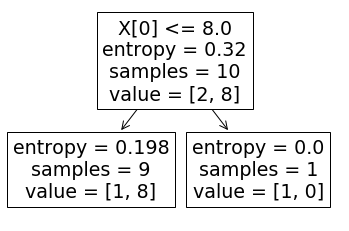

In [341]:
plot_tree(m2)

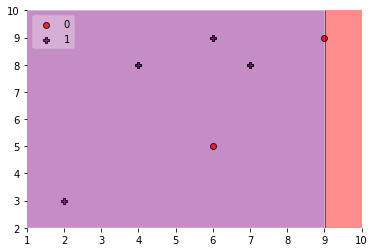

In [342]:
plot_decision_regions(X, y, clf=m2, legend=2,colors='red,purple',markers='oP')

In [343]:
second_df['y_pred'] = m2.predict(X)
second_df

,feature1,feature2,target,w,y_pred
1,9,9,0,0.1,0
3,6,5,0,0.1,1
4,6,9,1,0.1,1
2,7,8,1,0.1,1
2,7,8,1,0.1,1
6,4,8,1,0.1,1
8,2,3,1,0.1,1
6,4,8,1,0.1,1
4,6,9,1,0.1,1
2,7,8,1,0.1,1


Text(0, 0.5, 'Alpha')

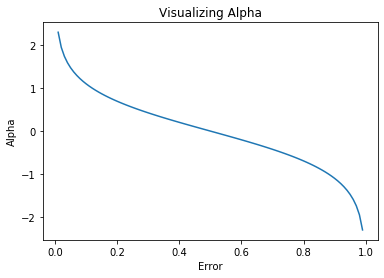

In [344]:
error = np.arange(0,1,0.01)
alpha_t = 1/2*np.log((1-error)/error) 

plt.plot(error, alpha_t)
plt.title('Visualizing Alpha')
plt.xlabel('Error')
plt.ylabel('Alpha')

In [345]:
alpha2 = calculate_model_wt(0.1)
alpha2

1.0986122886681098

In [346]:
def update_row_weights(row,alpha=1.09):
    if row['target'] == row['y_pred']:
        return row['w'] * np.exp(-alpha)
    else:
        return row['w'] * np.exp(alpha)

In [347]:
second_df['updated_w'] = second_df.apply(update_row_weights,axis=1)
second_df

,feature1,feature2,target,w,y_pred,updated_w
1,9,9,0,0.1,0,0.033622
3,6,5,0,0.1,1,0.297427
4,6,9,1,0.1,1,0.033622
2,7,8,1,0.1,1,0.033622
2,7,8,1,0.1,1,0.033622
6,4,8,1,0.1,1,0.033622
8,2,3,1,0.1,1,0.033622
6,4,8,1,0.1,1,0.033622
4,6,9,1,0.1,1,0.033622
2,7,8,1,0.1,1,0.033622


In [348]:
second_df['nomalized_w'] = second_df['updated_w']/second_df['updated_w'].sum()
second_df

,feature1,feature2,target,w,y_pred,updated_w,nomalized_w
1,9,9,0,0.1,0,0.033622,0.056034
3,6,5,0,0.1,1,0.297427,0.495694
4,6,9,1,0.1,1,0.033622,0.056034
2,7,8,1,0.1,1,0.033622,0.056034
2,7,8,1,0.1,1,0.033622,0.056034
6,4,8,1,0.1,1,0.033622,0.056034
8,2,3,1,0.1,1,0.033622,0.056034
6,4,8,1,0.1,1,0.033622,0.056034
4,6,9,1,0.1,1,0.033622,0.056034
2,7,8,1,0.1,1,0.033622,0.056034


In [349]:
second_df['nomalized_w'].sum()

0.9999999999999999

In [350]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_w'])

In [351]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_w']

In [352]:
second_df[['feature1','feature2','target','w','y_pred','nomalized_w','cumsum_lower','cumsum_upper']]

,feature1,feature2,target,w,y_pred,nomalized_w,cumsum_lower,cumsum_upper
1,9,9,0,0.1,0,0.056034,0.000000,0.056034
3,6,5,0,0.1,1,0.495694,0.056034,0.551728
4,6,9,1,0.1,1,0.056034,0.551728,0.607762
2,7,8,1,0.1,1,0.056034,0.607762,0.663796
2,7,8,1,0.1,1,0.056034,0.663796,0.719830
6,4,8,1,0.1,1,0.056034,0.719830,0.775864
8,2,3,1,0.1,1,0.056034,0.775864,0.831898
6,4,8,1,0.1,1,0.056034,0.831898,0.887932
4,6,9,1,0.1,1,0.056034,0.887932,0.943966
2,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [353]:
index_values = create_new_dataset(second_df)

In [354]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,feature1,feature2,target,w
2,7,8,1,0.1
3,6,5,0,0.1
8,2,3,1,0.1
2,7,8,1,0.1
2,7,8,1,0.1
2,7,8,1,0.1
2,7,8,1,0.1
8,2,3,1,0.1
8,2,3,1,0.1
2,7,8,1,0.1


In [355]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
m3 = DecisionTreeClassifier(max_depth=1)
m3.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

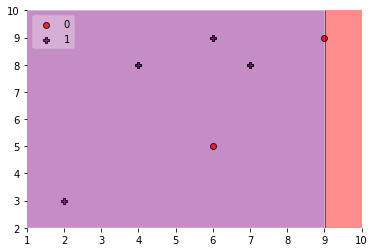

In [356]:
plot_decision_regions(X, y, clf=m3, legend=2,colors='red,purple',markers='oP')

In [357]:
third_df['y_pred'] = m3.predict(X)
third_df

,feature1,feature2,target,w,y_pred
2,7,8,1,0.1,0
3,6,5,0,0.1,1
8,2,3,1,0.1,1
2,7,8,1,0.1,1
2,7,8,1,0.1,1
2,7,8,1,0.1,1
2,7,8,1,0.1,1
8,2,3,1,0.1,1
8,2,3,1,0.1,1
2,7,8,1,0.1,1


Text(0, 0.5, 'Alpha')

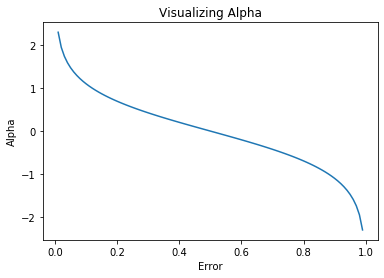

In [358]:
error = np.arange(0,1,0.01)
alpha_t = 1/2*np.log((1-error)/error) 

plt.plot(error, alpha_t)
plt.title('Visualizing Alpha')
plt.xlabel('Error')
plt.ylabel('Alpha')

In [360]:
alpha3 = calculate_model_wt(0.2)
alpha3

0.6931471805599453

In [361]:
#we get our alpha values
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 0.6931471805599453


In [362]:
#suppose we want to check for the point (1,5)
query = np.array([1,5]).reshape(1,2)
m1.predict(query)

array([1], dtype=int64)

In [363]:
m2.predict(query)

array([1], dtype=int64)

In [364]:
m3.predict(query)

array([1], dtype=int64)

In [365]:
alpha1*1 + alpha2*(1) + alpha3*(1)    #alpha1*h1 + alpha2*h2 + alpha3*h3

2.215408399421657

In [366]:
#sign of the above term gives us the class to which this point belong
np.sign(2.21)

1.0

#### Creating the dataframe

In [544]:
df = pd.DataFrame()
df['feature1'] = [9,9,7,6,6,5,4,3,2,1]
df['feature2'] = [2,9,8,5,9,1,8,6,3,5]
df['target'] =[-1,-1,1,-1,1,-1,1,-1,1,1]
df

,feature1,feature2,target
0,9,2,-1
1,9,9,-1
2,7,8,1
3,6,5,-1
4,6,9,1
5,5,1,-1
6,4,8,1
7,3,6,-1
8,2,3,1
9,1,5,1


In [545]:
df['w'] = 1/df.shape[0]
df

,feature1,feature2,target,w
0,9,2,-1,0.1
1,9,9,-1,0.1
2,7,8,1,0.1
3,6,5,-1,0.1
4,6,9,1,0.1
5,5,1,-1,0.1
6,4,8,1,0.1
7,3,6,-1,0.1
8,2,3,1,0.1
9,1,5,1,0.1


In [546]:
#features and target values
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [547]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [548]:
#visualizing our datapoints
def plot_adaboost(X: np.ndarray,
                  y: np.ndarray,
                  clf=None,
                  sample_weights: Optional[np.ndarray] = None,
                  annotate: bool = False,
                  ax: Optional[mpl.axes.Axes] = None) -> None:

    assert set(y) == {-1, 1}, 'Expecting response labels to be ±1'

    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        fig.set_facecolor('white')

    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='green')

    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='purple')

    if clf:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['g']
        else:
            fill_colors = ['purple', 'g']

        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)

    if annotate:
        for i, (x, y) in enumerate(X):
            offset = 0.05
            ax.annotate(f'$x_{i + 1}$', (x + offset, y - offset))

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

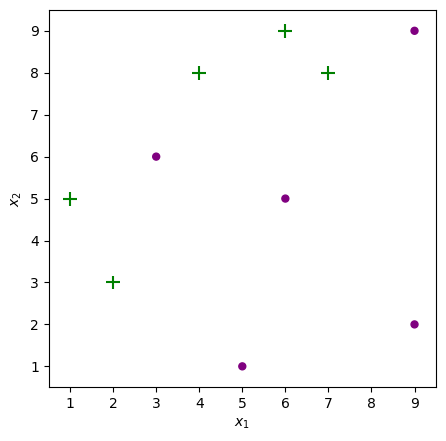

In [549]:
plot_adaboost(X, y)

In [550]:
class AdaBoost:
    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None

    def _check_X_y(self, X, y):
        assert set(y) == {-1, 1}, 'Response variable must be ±1'
        return X, y

In [551]:
from sklearn.tree import DecisionTreeClassifier
def fit(self, X: np.ndarray, y: np.ndarray, iters: int):
    X, y = self._check_X_y(X, y)
    n = X.shape[0]
    self.sample_weights = np.zeros(shape=(iters, n))
    self.stumps = np.zeros(shape=iters, dtype=object)
    self.stump_weights = np.zeros(shape=iters)
    self.errors = np.zeros(shape=iters)
    self.sample_weights[0] = np.ones(shape=n) / n
    for t in range(iters):
        curr_sample_weights = self.sample_weights[t]
        stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        stump = stump.fit(X, y, sample_weight=curr_sample_weights)
        stump_pred = stump.predict(X)
        err = curr_sample_weights[(stump_pred != y)].sum()# / n
        stump_weight = np.log((1 - err) / err) / 2
        new_sample_weights = (curr_sample_weights * np.exp(-stump_weight * y * stump_pred))
        new_sample_weights /= new_sample_weights.sum()
        if t+1 < iters:
            self.sample_weights[t+1] = new_sample_weights
        self.stumps[t] = stump
        self.stump_weights[t] = stump_weight
        self.errors[t] = err
    return self

#### Make predictions

In [552]:
def predict(self, X):
    stump_preds = np.array([stump.predict(X) for stump in self.stumps])
    return np.sign(np.dot(self.stump_weights, stump_preds))

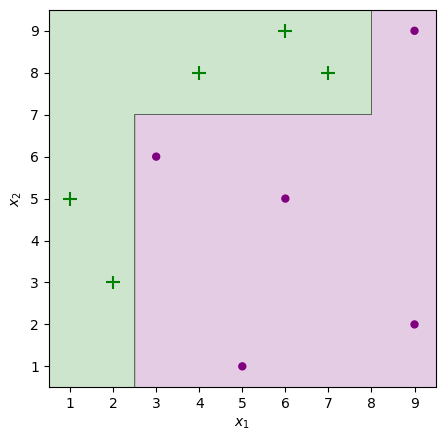

In [553]:
AdaBoost.fit = fit
AdaBoost.predict = predict
clf = AdaBoost().fit(X, y, iters=10)
plot_adaboost(X, y, clf)

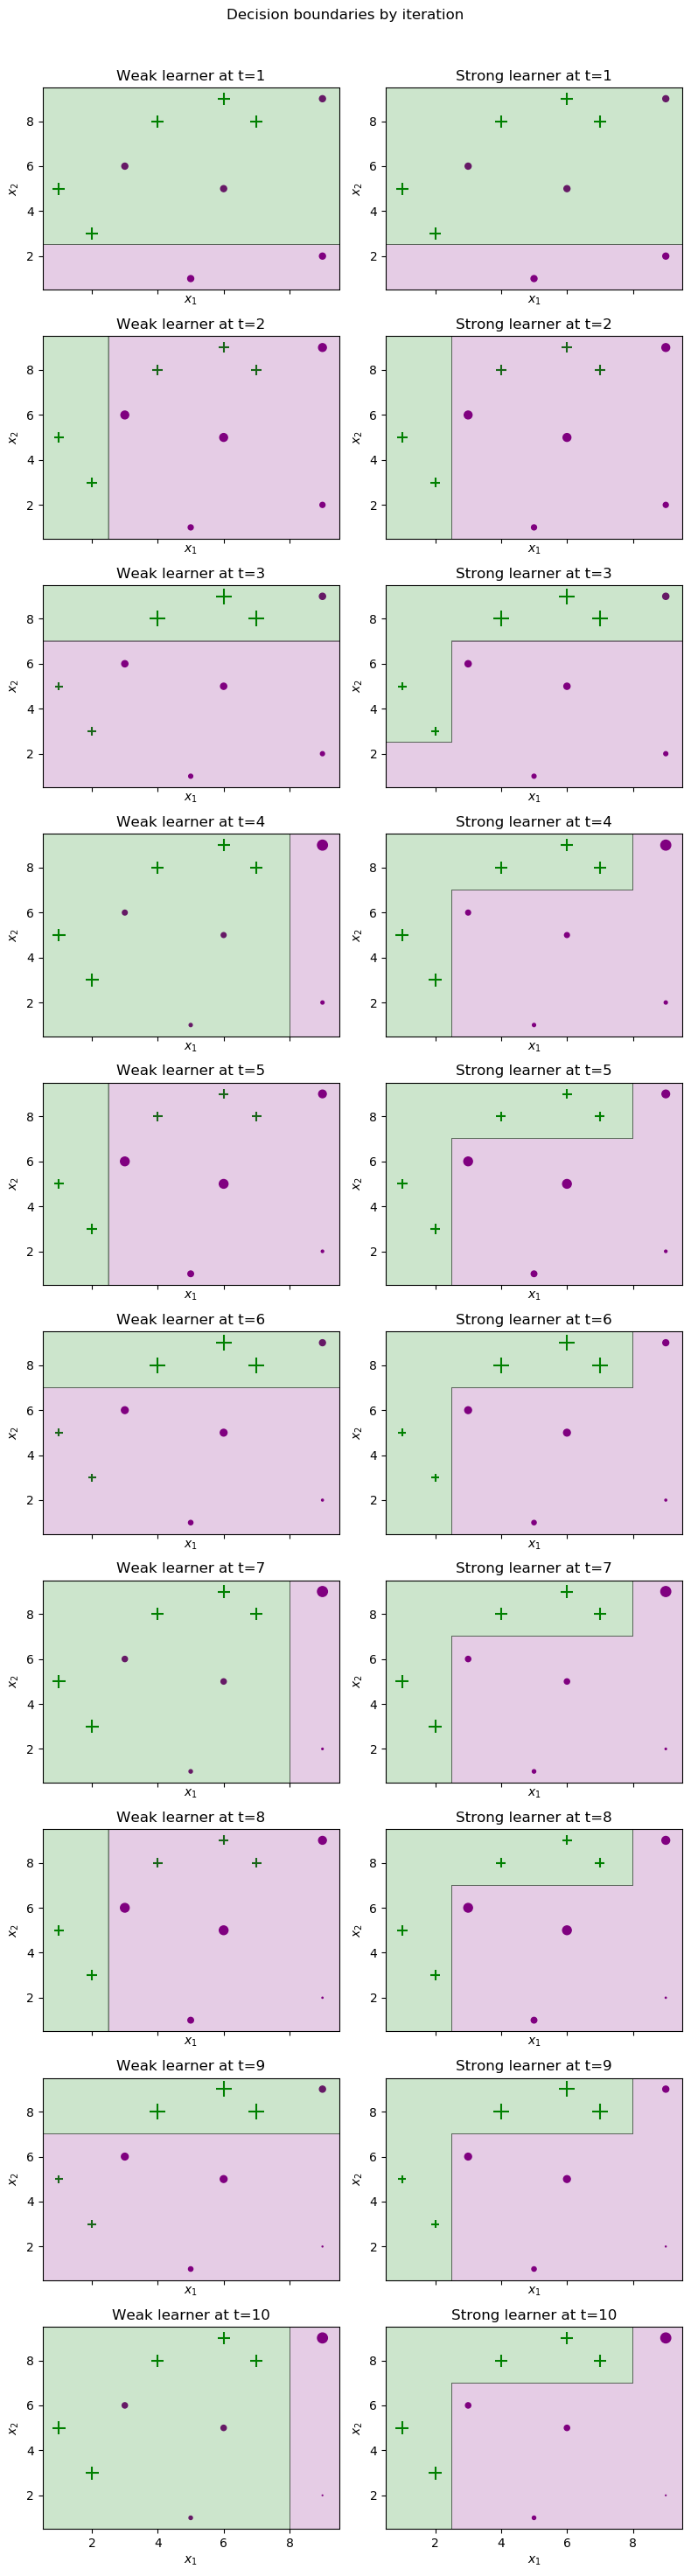

In [554]:
def truncate_adaboost(clf, t: int):
    assert t > 0, 't must be a positive integer'
    from copy import deepcopy
    new_clf = deepcopy(clf)
    new_clf.stumps = clf.stumps[:t]
    new_clf.stump_weights = clf.stump_weights[:t]
    return new_clf

def plot_staged_adaboost(X, y, clf, iters=10):
    fig, axes = plt.subplots(figsize=(8, iters*3),
                             nrows=iters,
                             ncols=2,
                             sharex=True,
                             dpi=100)
    fig.set_facecolor('white')
    _ = fig.suptitle('Decision boundaries by iteration')
    for i in range(iters):
        ax1, ax2 = axes[i]
        _ = ax1.set_title(f'Weak learner at t={i + 1}')
        plot_adaboost(X, y, clf.stumps[i],
                      sample_weights=clf.sample_weights[i],
                      annotate=False, ax=ax1)
        trunc_clf = truncate_adaboost(clf, t=i + 1)
        _ = ax2.set_title(f'Strong learner at t={i + 1}')
        plot_adaboost(X, y, trunc_clf,
                      sample_weights=clf.sample_weights[i],
                      annotate=False, ax=ax2)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
clf = AdaBoost().fit(X, y, iters=10)
plot_staged_adaboost(X, y, clf)

#### Comparing with sklearn's inbuilt adaboost classifier

In [603]:
df = pd.DataFrame()
df['feature1'] = [9,9,7,6,6,5,4,3,2,1]
df['feature2'] = [2,9,8,5,9,1,8,6,3,5]
df['target'] =[-1,-1,1,-1,1,-1,1,-1,1,1]
df

,feature1,feature2,target
0,9,2,-1
1,9,9,-1
2,7,8,1
3,6,5,-1
4,6,9,1
5,5,1,-1
6,4,8,1
7,3,6,-1
8,2,3,1
9,1,5,1


In [604]:
df['w'] = 1/df.shape[0]
df

,feature1,feature2,target,w
0,9,2,-1,0.1
1,9,9,-1,0.1
2,7,8,1,0.1
3,6,5,-1,0.1
4,6,9,1,0.1
5,5,1,-1,0.1
6,4,8,1,0.1
7,3,6,-1,0.1
8,2,3,1,0.1
9,1,5,1,0.1


In [605]:
X = df.iloc[:,0:2].values   #features
y = df.iloc[:,2].values     #target

#### Split the dataset into 70:30

In [606]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Adaboost classifier with n_estimators=1

In [607]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=1,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

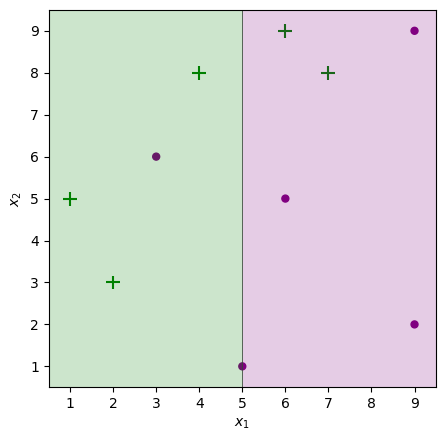

In [608]:
plot_adaboost(X, y, model)

#### Adaboost classifier with n_estimators=5

In [609]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [610]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

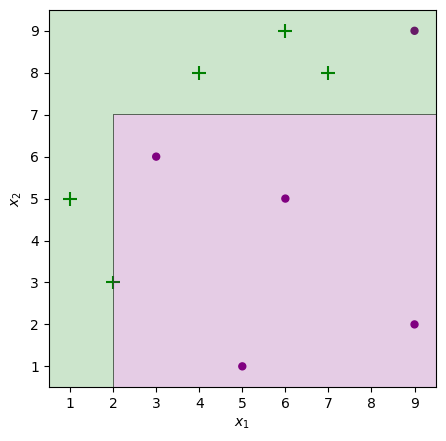

In [611]:
plot_adaboost(X, y, model)

#### Adaboost classifier with n_estimators=10

In [612]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [613]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=10,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

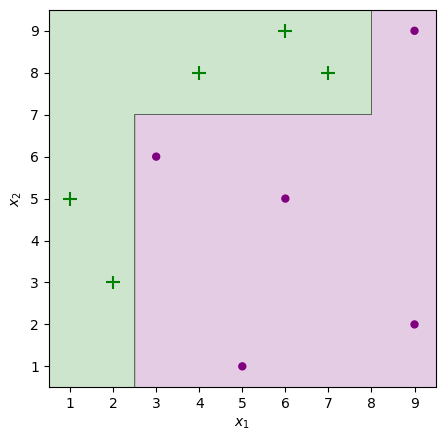

In [614]:
plot_adaboost(X, y, model)